In [1]:
!pip install gradio

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import gradio as gr

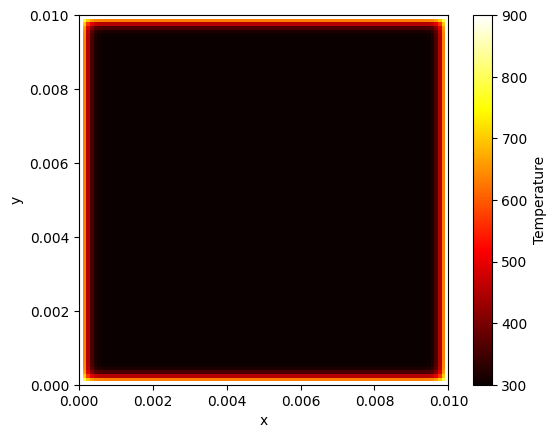

In [13]:
def td(k0,C0,B,density,T0,T1,T2,T3,T4,dt,timesteps):
    Lx = 0.01
    Ly = 0.01
    Nx = 100
    Ny = 100
    dx = Lx/(Nx)
    dy = Ly/(Ny)

    # k0 = 25
    # C0 = 800
    # B = 1e-4
    # density = 7000
    R = 0

    # T0 = 300
    # T1 = 900
    # T2 = 900
    # T3 = 900
    # T4 = 900

    # dt = 0.05
    # timesteps = 500

    T = np.ones((Nx+2,Ny+2))*T0
    T_next = np.ones((Nx+2,Ny+2))*T0
    full_T = [T]

    T[:,0] = T4
    T[:,-1] = T2
    T[0,:] = T1
    T[-1,:] = T3
    T_next[:,0] = T4
    T_next[:,-1] = T2
    T_next[0,:] = T1
    T_next[-1,:] = T3

    for tstep in range(timesteps):
        for i in range(1,Nx+1):
            for j in range(1,Ny+1):

                Txminus = T[i-1,j]
                Tx = T[i,j]
                Txplus = T[i+1,j]

                Tyminus = T[i,j-1]
                Ty = T[i,j]
                Typlus = T[i,j+1]

                kxminus = k0*(1+B*Txminus)
                kx = k0*(1+B*Tx)
                kxplus = k0*(1+B*Txplus)

                kyminus = k0*(1+B*Tyminus)
                ky = k0*(1+B*Ty)
                kyplus = k0*(1+B*Typlus)

                Cxminus = C0*(1+B*Txminus)**2
                Cx = C0*(1+B*Tx)**2
                Cxplus = C0*(1+B*Txplus)**2

                Cyminus = C0*(1+B*Tyminus)**2
                Cy = C0*(1+B*Ty)**2
                Cyplus = C0*(1+B*Typlus)**2

                Kxminus = dy/((dx/2*kxminus)+(dx/2*kx))
                Kxplus = dy/((dx/2*kx)+(dx/2*kxplus))
                Kyminus = dx/((dy/2*kyminus)+(dy/2*ky))
                Kyplus = dx/((dy/2*ky)+(dy/2*kyplus))

                Qxminus = Kxminus * (Txminus - Tx)
                Qxplus = Kxplus * (Tx - Txplus)
                Qyminus = Kyminus * (Tyminus - Ty)
                Qyplus = Kyplus * (Ty - Typlus)

                T_next[i,j] = T[i,j] + dt* (Qxminus-Qxplus+Qyminus-Qyplus) / (Cx*dx*dy*density)
        full_T.append(np.copy(T_next))
        T = np.copy(T_next)


    fig = plt.imshow(full_T[timesteps-1], cmap='hot', extent = [0, Lx, 0, Ly])
    plt.colorbar(label='Temperature')
    plt.xlabel('x')
    plt.ylabel('y')
    # plt.savefig('final_dist.png')
    return fig

td(25,800,1e-4,7000,300,900,900,900,900,0.05,50)

In [14]:
Image_displayer = gr.Interface(
    fn=td,
    inputs=[gr.Number(value=25,label='k0'),gr.Number(value=800,label='C0'),gr.Number(value=1e-4,label='B'),gr.Number(value=7000,label='density'),
            gr.Number(value=300,label='initial body temperature'),gr.Number(value=900,label='left edge initial temperature'),
            gr.Number(value=900,label='right edge initial temperature'),gr.Number(value=900,label='top edge initial temperature'),
            gr.Number(value=900, label='bottom edge initial temperature'),gr.Number(value=0.05,label='timestep size'),
            gr.Number(value=500,label='number of timesteps to calculate for')],
    outputs=gr.Plot(),
    title='2D Transient Heat Conduction Temperature Profile'
)
if __name__ == "__main__":
    Image_displayer.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://85c845730afe80cf62.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
